# OAT - Convert Daily Yields to Monthly Averages

This notebook reads the daily France 10-Year Yield data and converts it to monthly averages.

The output CSV will contain:
- Date: Last day of each month
- Value: Monthly average of daily yields


In [1]:
import pandas as pd
import os
import warnings
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

warnings.filterwarnings('ignore')


In [2]:
# Change to project root directory
# Find the project root by looking for the 'data' directory
current_dir = os.getcwd()
while not os.path.exists(os.path.join(current_dir, 'data')):
    parent_dir = os.path.dirname(current_dir)
    if parent_dir == current_dir:
        # Reached filesystem root without finding 'data' directory
        raise FileNotFoundError("Could not find project root directory (looking for 'data' folder)")
    current_dir = parent_dir

os.chdir(current_dir)
print(f"Working directory: {os.getcwd()}")

# Define input and output files
input_file = 'data/oat/FRANCE_10_YEARS_DAILY_YIELDS.csv'
output_file = 'data/oat/FRANCE_10_YEARS_MONTHLY_YIELDS.csv'

# Check that the input file exists
if not os.path.exists(input_file):
    raise FileNotFoundError(f"File not found: {input_file}")

print(f"Input file: {input_file}")
print(f"Output file: {output_file}")


Working directory: /workspace
Input file: data/oat/FRANCE_10_YEARS_DAILY_YIELDS.csv
Output file: data/oat/FRANCE_10_YEARS_MONTHLY_YIELDS.csv


In [3]:
# Read the daily yields CSV file
print("Reading daily yields CSV file...")
df_daily = pd.read_csv(input_file)

print(f"Data shape: {df_daily.shape}")
print(f"\nColumn names:")
print(df_daily.columns.tolist())
print(f"\nFirst few rows:")
print(df_daily.head(10))
print(f"\nLast few rows:")
print(df_daily.tail(10))


Reading daily yields CSV file...
Data shape: (7703, 2)

Column names:
['date', 'value']

First few rows:
         date  value
0  2004-11-03   3.97
1  2004-11-04   3.93
2  2004-11-05   3.91
3  2004-11-06   3.96
4  2004-11-07   3.96
5  2004-11-08   3.96
6  2004-11-09   3.95
7  2004-11-10   3.92
8  2004-11-11   3.90
9  2004-11-12   3.85

Last few rows:
            date  value
7693  2025-11-26   3.41
7694  2025-11-27   3.41
7695  2025-11-28   3.41
7696  2025-11-29   3.45
7697  2025-11-30   3.45
7698  2025-12-01   3.45
7699  2025-12-02   3.49
7700  2025-12-03   3.50
7701  2025-12-04   3.50
7702  2025-12-05   3.53


In [4]:
# Convert date column to datetime
df_daily['date'] = pd.to_datetime(df_daily['date'], format='%Y-%m-%d', errors='coerce')

# Remove rows with invalid dates
df_daily = df_daily[df_daily['date'].notna()].copy()

# Ensure value column is numeric
df_daily['value'] = pd.to_numeric(df_daily['value'], errors='coerce')

# Remove rows with invalid values
df_daily = df_daily[df_daily['value'].notna()].copy()

# Sort by date
df_daily = df_daily.sort_values(by='date').reset_index(drop=True)

print(f"Date range: {df_daily['date'].min()} to {df_daily['date'].max()}")
print(f"Total daily rows: {len(df_daily)}")
print(f"\nFirst few rows:")
print(df_daily.head(10))


Date range: 2004-11-03 00:00:00 to 2025-12-05 00:00:00
Total daily rows: 7703

First few rows:
        date  value
0 2004-11-03   3.97
1 2004-11-04   3.93
2 2004-11-05   3.91
3 2004-11-06   3.96
4 2004-11-07   3.96
5 2004-11-08   3.96
6 2004-11-09   3.95
7 2004-11-10   3.92
8 2004-11-11   3.90
9 2004-11-12   3.85


In [5]:
# Create year-month column for grouping
df_daily['year_month'] = df_daily['date'].dt.to_period('M')

# Group by year-month and calculate monthly average
df_monthly = df_daily.groupby('year_month')['value'].mean().reset_index()
df_monthly.columns = ['year_month', 'value']

print(f"Monthly averages calculated: {len(df_monthly)} months")
print(f"\nFirst few rows:")
print(df_monthly.head(10))


Monthly averages calculated: 254 months

First few rows:
  year_month     value
0    2004-11  3.851786
1    2004-12  3.646774
2    2005-01  3.593226
3    2005-02  3.588929
4    2005-03  3.748065
5    2005-04  3.540000
6    2005-05  3.389032
7    2005-06  3.210333
8    2005-07  3.247419
9    2005-08  3.280323


In [6]:
# Convert period to datetime and get the last day of each month
# Using to_timestamp with how='end' to get the last day of the month
df_monthly['date'] = df_monthly['year_month'].dt.to_timestamp(how='end')

# Select only date and value columns
df_output = df_monthly[['date', 'value']].copy()

print(f"Final monthly data: {len(df_output)} rows")
print(f"Date range: {df_output['date'].min()} to {df_output['date'].max()}")
print(f"\nFirst few rows:")
print(df_output.head(10))
print(f"\nLast few rows:")
print(df_output.tail(10))


Final monthly data: 254 rows
Date range: 2004-11-30 23:59:59.999999999 to 2025-12-31 23:59:59.999999999

First few rows:
                           date     value
0 2004-11-30 23:59:59.999999999  3.851786
1 2004-12-31 23:59:59.999999999  3.646774
2 2005-01-31 23:59:59.999999999  3.593226
3 2005-02-28 23:59:59.999999999  3.588929
4 2005-03-31 23:59:59.999999999  3.748065
5 2005-04-30 23:59:59.999999999  3.540000
6 2005-05-31 23:59:59.999999999  3.389032
7 2005-06-30 23:59:59.999999999  3.210333
8 2005-07-31 23:59:59.999999999  3.247419
9 2005-08-31 23:59:59.999999999  3.280323

Last few rows:
                             date     value
244 2025-03-31 23:59:59.999999999  3.417742
245 2025-04-30 23:59:59.999999999  3.249667
246 2025-05-31 23:59:59.999999999  3.259677
247 2025-06-30 23:59:59.999999999  3.241000
248 2025-07-31 23:59:59.999999999  3.365806
249 2025-08-31 23:59:59.999999999  3.432903
250 2025-09-30 23:59:59.999999999  3.510000
251 2025-10-31 23:59:59.999999999  3.440968
252 2

In [7]:
# Create output directory if it doesn't exist
os.makedirs(os.path.dirname(output_file), exist_ok=True)

# Format date as string (YYYY-MM-DD) for CSV output
df_to_save = df_output.copy()
df_to_save['date'] = df_to_save['date'].dt.strftime('%Y-%m-%d')

# Save to CSV (format: date,value)
df_to_save.to_csv(output_file, index=False)
print(f"File saved successfully: {output_file}")
print(f"Dimensions: {len(df_to_save)} rows, {len(df_to_save.columns)} columns")
print(f"\nFinal data summary:")
print(df_output.describe())


File saved successfully: data/oat/FRANCE_10_YEARS_MONTHLY_YIELDS.csv
Dimensions: 254 rows, 2 columns

Final data summary:
                                date       value
count                            254  254.000000
mean   2015-06-16 20:18:53.858267648    2.201509
min    2004-11-30 23:59:59.999999999   -0.349032
25%              2010-03-08 18:00:00    0.752606
50%              2015-06-16 00:00:00    2.639839
75%              2020-09-23 12:00:00    3.439892
max    2025-12-31 23:59:59.999999999    4.714000
std                              NaN    1.475932


Plot saved to: data/oat/FRANCE_10_YEARS_MONTHLY_YIELDS_plot.png


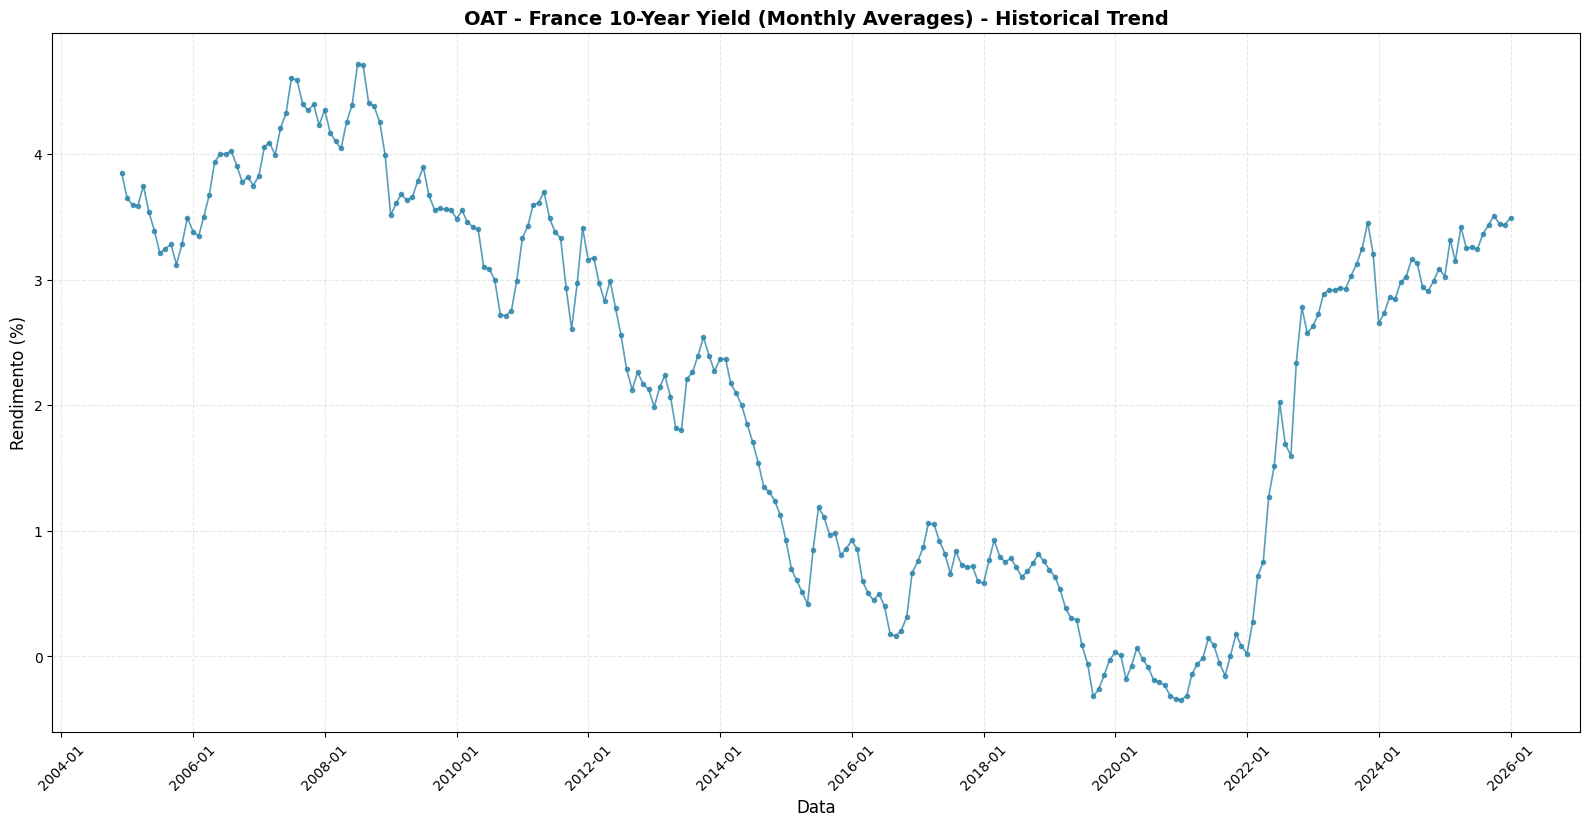

In [8]:
# Create a plot of the monthly data
plt.figure(figsize=(16, 8))
plt.plot(df_output['date'], df_output['value'], linewidth=1.2, color='#2E86AB', alpha=0.8, marker='o', markersize=3)
plt.title('OAT - France 10-Year Yield (Monthly Averages) - Historical Trend', 
          fontsize=14, fontweight='bold')
plt.xlabel('Data', fontsize=12)
plt.ylabel('Rendimento (%)', fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()

# Format x-axis dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))  # Show every 2 years
plt.xticks(rotation=45)

# Save plot
plot_file = os.path.join(os.path.dirname(output_file), 'FRANCE_10_YEARS_MONTHLY_YIELDS_plot.png')
plt.savefig(plot_file, dpi=150, bbox_inches='tight')
print(f"Plot saved to: {plot_file}")

plt.show()


# Regression Analysis: TEC10_m vs IRS_m

This section performs a linear regression analysis between:
- TEC10_m: France 10-Year Yield monthly averages (from OAT data)
- IRS_m: Long-Term Interest Rate (from ECB data)

The analysis covers the common period: 2004-11 to 2025-10


In [9]:
import statsmodels.api as sm


In [10]:
# Read the two CSV files
oat_file = 'data/oat/FRANCE_10_YEARS_MONTHLY_YIELDS.csv'
ecb_file = 'data/ecb/IRS_FRANCE_MONTHLY.csv'

print("Reading OAT file...")
df_oat = pd.read_csv(oat_file)
df_oat['date'] = pd.to_datetime(df_oat['date'], format='%Y-%m-%d', errors='coerce')
df_oat = df_oat.rename(columns={'value': 'TEC10_m'})

print("Reading ECB file...")
df_ecb = pd.read_csv(ecb_file)
df_ecb['DATE'] = pd.to_datetime(df_ecb['DATE'], format='%Y-%m-%d', errors='coerce')
df_ecb = df_ecb.rename(columns={'DATE': 'date', 'Long-Term interest rate': 'IRS_m'})

print(f"\nOAT data shape: {df_oat.shape}")
print(f"OAT date range: {df_oat['date'].min()} to {df_oat['date'].max()}")
print(f"\nECB data shape: {df_ecb.shape}")
print(f"ECB date range: {df_ecb['date'].min()} to {df_ecb['date'].max()}")


Reading OAT file...
Reading ECB file...

OAT data shape: (254, 2)
OAT date range: 2004-11-30 00:00:00 to 2025-12-31 00:00:00

ECB data shape: (478, 2)
ECB date range: 1986-01-31 00:00:00 to 2025-10-31 00:00:00


In [11]:
# Merge the two dataframes on date (inner join to keep only common dates)
df_merged = pd.merge(df_oat[['date', 'TEC10_m']], df_ecb[['date', 'IRS_m']], 
                     on='date', how='inner')

# Filter for the common period: 2004-11 to 2025-10
start_date = pd.to_datetime('2004-11-30')
end_date = pd.to_datetime('2025-10-31')

df_merged = df_merged[(df_merged['date'] >= start_date) & (df_merged['date'] <= end_date)].copy()
df_merged = df_merged.sort_values(by='date').reset_index(drop=True)

print(f"Merged data shape: {df_merged.shape}")
print(f"Date range: {df_merged['date'].min()} to {df_merged['date'].max()}")
print(f"\nFirst few rows:")
print(df_merged.head(10))
print(f"\nLast few rows:")
print(df_merged.tail(10))
print(f"\nData summary:")
print(df_merged.describe())


Merged data shape: (252, 3)
Date range: 2004-11-30 00:00:00 to 2025-10-31 00:00:00

First few rows:
        date   TEC10_m  IRS_m
0 2004-11-30  3.851786   3.86
1 2004-12-31  3.646774   3.64
2 2005-01-31  3.593226   3.58
3 2005-02-28  3.588929   3.60
4 2005-03-31  3.748065   3.75
5 2005-04-30  3.540000   3.54
6 2005-05-31  3.389032   3.38
7 2005-06-30  3.210333   3.20
8 2005-07-31  3.247419   3.27
9 2005-08-31  3.280323   3.30

Last few rows:
          date   TEC10_m  IRS_m
242 2025-01-31  3.316774   3.32
243 2025-02-28  3.148214   3.15
244 2025-03-31  3.417742   3.43
245 2025-04-30  3.249667   3.26
246 2025-05-31  3.259677   3.26
247 2025-06-30  3.241000   3.24
248 2025-07-31  3.365806   3.36
249 2025-08-31  3.432903   3.42
250 2025-09-30  3.510000   3.51
251 2025-10-31  3.440968   3.44

Data summary:
                                date     TEC10_m       IRS_m
count                            252  252.000000  252.000000
mean   2015-05-16 09:42:51.428571392    2.191478    2.200317
min 

In [12]:
# Prepare data for OLS regression
# X: IRS_m (independent variable)
# y: TEC10_m (dependent variable)
X = df_merged['IRS_m']
y = df_merged['TEC10_m']

# Add constant term for intercept
X_with_const = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(y, X_with_const).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                TEC10_m   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.706e+05
Date:                Mon, 08 Dec 2025   Prob (F-statistic):               0.00
Time:                        10:49:18   Log-Likelihood:                 556.83
No. Observations:                 252   AIC:                            -1110.
Df Residuals:                     250   BIC:                            -1103.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0182      0.003     -6.019      0.0

Scatter plot saved to: data/oat/TEC10_vs_IRS_scatter.png


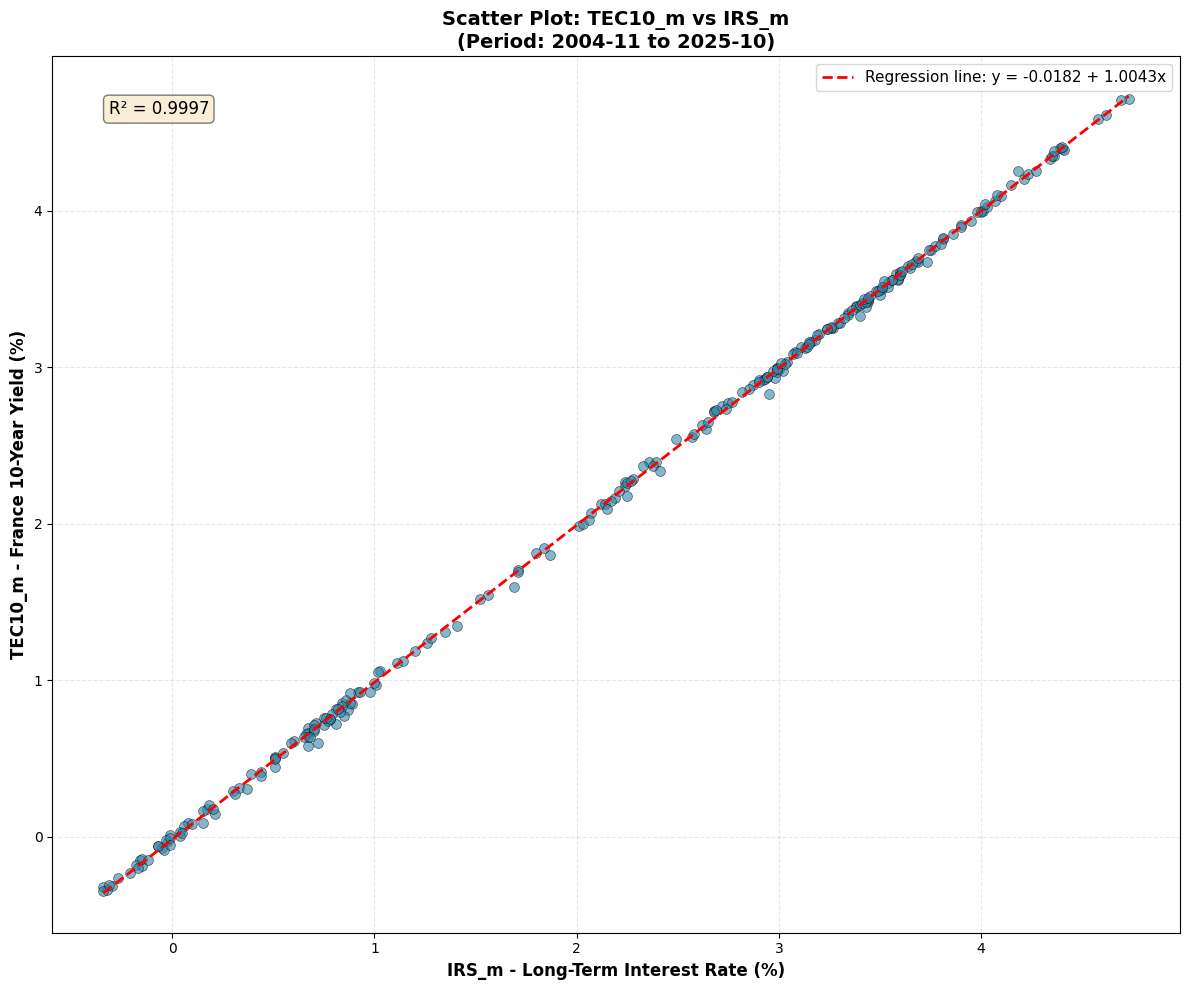

In [13]:
# Create scatter plot: TEC10_m vs IRS_m
plt.figure(figsize=(12, 10))

# Scatter plot
plt.scatter(df_merged['IRS_m'], df_merged['TEC10_m'], 
           alpha=0.6, s=50, color='#2E86AB', edgecolors='black', linewidth=0.5)

# Add regression line
X_plot = df_merged['IRS_m'].sort_values()
y_plot = model.params['const'] + model.params['IRS_m'] * X_plot
plt.plot(X_plot, y_plot, 'r--', linewidth=2, label=f'Regression line: y = {model.params["const"]:.4f} + {model.params["IRS_m"]:.4f}x')

# Add R-squared to the plot
r_squared = model.rsquared
plt.text(0.05, 0.95, f'R² = {r_squared:.4f}', 
         transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.xlabel('IRS_m - Long-Term Interest Rate (%)', fontsize=12, fontweight='bold')
plt.ylabel('TEC10_m - France 10-Year Yield (%)', fontsize=12, fontweight='bold')
plt.title('Scatter Plot: TEC10_m vs IRS_m\n(Period: 2004-11 to 2025-10)', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(loc='best', fontsize=11)
plt.tight_layout()

# Save plot
plot_file = 'data/oat/TEC10_vs_IRS_scatter.png'
os.makedirs(os.path.dirname(plot_file), exist_ok=True)
plt.savefig(plot_file, dpi=150, bbox_inches='tight')
print(f"Scatter plot saved to: {plot_file}")

plt.show()
